In [ ]:

# from google.colab import drive
# drive.mount('/content/drive')

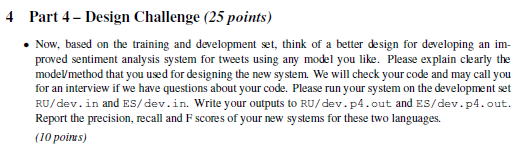

# Naive Bayes Method

## Use training set to determine the conditional probability 

## Then set a rule for unknown words

In [ ]:
## Naive Bayes Method

## PreProcessing

def get_all_text_tags(filename):
  with open(filename,'r') as f:
    text = f.readlines()

  all_text_tags = []

  # outputs a list of with 0th element as natural language word(x), 1st element as tag (O,B-Positive,...)(y)
  for i in text:
    new_text = i.replace("\n","") # remove trailing characters \n

    if new_text == ". .. O": # Handles the . .. issue for the russian training set. Need to find a better way to do this.
      inner_list = ['. ..', 'O']
      all_text_tags.append(inner_list)
    elif new_text ==". ... O":
      inner_list = ['. ...', 'O']
      all_text_tags.append(inner_list)
    elif new_text ==". ..":
      inner_list = ['. ..']
      all_text_tags.append(inner_list)
    elif new_text ==". ...":
      inner_list = ['. ...']
      all_text_tags.append(inner_list)
    else:
      inner_list = new_text.split(' ')
      all_text_tags.append(inner_list)
    

  return all_text_tags


# This function returns all the sentences and corresponding tags for the words in the sentence
# We will require both of these values in our algorithm

def get_sentences(all_text_tags):
  inner_sentence = []
  inner_tags = []
  all_sentences = []
  all_tags = []
  for text_tags in all_text_tags:
    if text_tags[0] == '':
      all_sentences.append(inner_sentence)
      all_tags.append(inner_tags)
      inner_sentence = []
      inner_tags = []
    else:
      inner_sentence.append(text_tags[0])
      try:
        inner_tags.append(text_tags[1])
      except:
        continue

  return all_sentences, all_tags


def get_tag_count(tags_sentence):
  tags_count = {'START':0 ,'O': 0, 'B-neutral' : 0 ,'B-positive' : 0,'B-negative' : 0,'I-neutral' : 0 ,'I-positive': 0,'I-negative': 0}
  for sentence in tags_sentence:
    tags_count['START'] +=1
    for tag in sentence:
      tags_count[tag] += 1
      
  return tags_count
        


def create_tag_dictionary(tags_sentences):
  # print(tags_sentences)
  tags_dict = {'START': {}, 'O': {}, 'B-neutral' : {} ,'B-positive' : {},'B-negative' : {},'I-neutral' : {} ,'I-positive': {},'I-negative': {}}
  sub_dict = {'O': 0, 'B-neutral' : 0 ,'B-positive' : 0,'B-negative' : 0,'I-neutral' : 0 ,'I-positive': 0,'I-negative': 0, 'STOP': 0} # next tag
  for keys in tags_dict.keys():
    tags_dict[keys] = sub_dict.copy()
  count = 0
  for sentence in tags_sentences:
    if len(sentence) == 1:            #special case
      if sentence[0] == 'O':
        count+=1
      tags_dict['START'][sentence[0]] += 1
      tags_dict[sentence[0]]['STOP'] += 1 
    else:
      for i in range(len(sentence)):
        if sentence[i] == 'O':
          count+=1
        if i == 0:
          tags_dict['START'][sentence[i]] += 1        #add the first word
        elif i == len(sentence) - 1:
          tags_dict[sentence[i-1]][sentence[i]] += 1  #add the word that comes before it
          tags_dict[sentence[i]]['STOP'] += 1        #add the stop after it as well.
        else:
          tags_dict[sentence[i-1]][sentence[i]] += 1
  print('O',count)
  return tags_dict


def get_word_prob(sentences,tags_sentences,tags_count,n=5):
  # We set all values to 1 because of pseudocounts. 
  # This eliminates the scenario where if we encounter a certain word where one tag is not 0 withe rest being 0
  # It will definitely be that tag. 
  sub_dict = {'O': 1, 'B-neutral' : 1 ,'B-positive' : 1,'B-negative' : 1,'I-neutral' : 1 ,'I-positive': 1,'I-negative': 1}
  # Same as emission MLE steps 
  word_prob_dictionary = {}
  for i in range(len(sentences)):
    for j in range(len(sentences[i])):
      if sentences[i][j] not in word_prob_dictionary:
        word_prob_dictionary[sentences[i][j]] = sub_dict.copy()
        word_prob_dictionary[sentences[i][j]][tags_sentences[i][j]] += 1
      else:
        word_prob_dictionary[sentences[i][j]][tags_sentences[i][j]] += 1

  word_prob_dictionary['special'] = sub_dict.copy()
  to_pop = []
  # If a word has less than 10 counts in the training set, move that to 'special'
  for keys in word_prob_dictionary.keys():
    if sum(word_prob_dictionary[keys].values()) - 7 < n: #-7 to offset the initial 7 counts
      to_pop.append(keys)
      for tags in word_prob_dictionary[keys].keys():
        word_prob_dictionary['special'][tags] += word_prob_dictionary[keys][tags] - 1

      
  for words in to_pop:
    word_prob_dictionary.pop(words)

  for keys in word_prob_dictionary.keys():
    for tags in word_prob_dictionary[keys].keys():
      word_prob_dictionary[keys][tags] = word_prob_dictionary[keys][tags]/tags_count[tags]

  return word_prob_dictionary
        


# RU_all_text_tags = get_all_text_tags('./drive/MyDrive/RU/RU/train')
RU_all_text_tags = get_all_text_tags('./RU/train')
RU_sentences, RU_tags_sentence = get_sentences(RU_all_text_tags)
RU_tags_count = get_tag_count(RU_tags_sentence)
RU_tags_dictionary = create_tag_dictionary(RU_tags_sentence)
RU_word_prob = get_word_prob(RU_sentences,RU_tags_sentence,RU_tags_count)

# ES_all_text_tags = get_all_text_tags('./drive/MyDrive/ES/ES/train')
ES_all_text_tags = get_all_text_tags('./ES/train')
ES_sentences, ES_tags_sentence = get_sentences(ES_all_text_tags)
ES_tags_count = get_tag_count(ES_tags_sentence)
ES_tags_dictionary = create_tag_dictionary(ES_tags_sentence)
ES_word_prob = get_word_prob(ES_sentences,ES_tags_sentence,ES_tags_count)

print(ES_word_prob['special'])
print(RU_word_prob['special'])
print(ES_word_prob)
print(RU_word_prob)

O 44640
O 31627
{'O': 0.18825686913080597, 'B-neutral': 0.21176470588235294, 'B-positive': 0.16875981161695447, 'B-negative': 0.29603729603729606, 'I-neutral': 0.3181818181818182, 'I-positive': 0.3175, 'I-negative': 0.31004366812227074}
{'O': 0.20145609318996416, 'B-neutral': 0.26126126126126126, 'B-positive': 0.2842304060434372, 'B-negative': 0.27149321266968324, 'I-neutral': 0.3, 'I-positive': 0.36468885672937773, 'I-negative': 0.3951612903225806}
{'de': {'O': 0.034527460713946946, 'B-neutral': 0.011764705882352941, 'B-positive': 0.0007849293563579278, 'B-negative': 0.002331002331002331, 'I-neutral': 0.18181818181818182, 'I-positive': 0.185, 'I-negative': 0.18340611353711792}, 'una': {'O': 0.007556834350396813, 'B-neutral': 0.011764705882352941, 'B-positive': 0.0007849293563579278, 'B-negative': 0.002331002331002331, 'I-neutral': 0.022727272727272728, 'I-positive': 0.005, 'I-negative': 0.004366812227074236}, 'calidad': {'O': 0.005058968602776109, 'B-neutral': 0.011764705882352941, 'B

In [ ]:
# Now we need to get the probability of which tag is likely to be

def get_tag_prob(tags_count):
  tags_count.pop('START',None)
  total = sum(tags_count.values())
  sub_dict = {'O': 0, 'B-neutral' : 0 ,'B-positive' : 0,'B-negative' : 0,'I-neutral' : 0,'I-positive': 0,'I-negative': 0}
  for keys in tags_count.keys():
    sub_dict[keys] = tags_count[keys]/total 

  return sub_dict

ES_tag_prob = get_tag_prob(ES_tags_count)
RU_tag_prob = get_tag_prob(RU_tags_count)

print(ES_tag_prob)
print(RU_tag_prob)

{'O': 0.9278045059845107, 'B-neutral': 0.0024935461159352264, 'B-positive': 0.037373855902370336, 'B-negative': 0.012585073926308378, 'I-neutral': 0.0012907768129547055, 'I-positive': 0.011734334663224596, 'I-negative': 0.006717906594696081}
{'O': 0.9240896764444076, 'B-neutral': 0.0045956072618875115, 'B-positive': 0.04384457739044031, 'B-negative': 0.00914981265655081, 'I-neutral': 0.0014490653528474134, 'I-positive': 0.01430434512596518, 'I-negative': 0.0025669157679011323}


In [ ]:
# Now we can try on the test set.

# ES_input = get_all_text_tags('./drive/MyDrive/ES/ES/dev.in')
# RU_input = get_all_text_tags('./drive/MyDrive/RU/RU/dev.in')
ES_input = get_all_text_tags('./ES/dev.in')
RU_input = get_all_text_tags('./RU/dev.in')

ES_input = [word for x in ES_input for word in x]
RU_input = [word for x in RU_input for word in x]

print(ES_input)
print(RU_input)

['La', 'comida', 'estuvo', 'muy', 'sabrosa', '.', '', 'Servicio', 'esmerado', '.', '', 'Para', 'un', 'menu', 'gastronomico', ',', 'si', 'la', 'comida', 'es', 'solo', 'buena', ',', 'por', 'no', 'decir', 'discreta', '(', 'en', 'lo', 'que', 'a', 'paella', 'como', 'plato', 'principal', 'se', 'refiere', ')', 'el', 'resultado', 'fue', 'algo', 'decepcionante', ',', 'aunque', 'el', 'precio', 'podria', 'considerarse', 'excepcional', '.', '', 'Servicio', 'atento', 'y', 'eficiente', ',', 'ambiente', 'agradable', '.', '', 'Tienen', 'una', 'carta', 'bastante', 'extensa', 'donde', 'cada', 'plato', 'parece', 'mejor', 'que', 'el', 'anterior', '.', '', 'Un', '10', 'en', 'comida', 'mediterranea', '!', '', 'Una', 'verguenza', 'todo', '.', '', 'lo', 'tendre', 'en', 'cuenta', 'para', 'las', 'proximas', 'veces', '.', '', 'Mi', 'opinión', 'sobre', 'el', 'restaurante', 'La', 'Poma', 'es', 'que', 'es', 'correcto', ',', 'pero', 'no', 'extraordinario', '.', '', 'P', '.', 'D', '.', '', 'A', 'la', 'una', 'mi', 'mu

In [ ]:
# Define the classifier here

# Formula is P(tag) * P(word|tag)
def NB_predictor(input,word_prob,tag_prob):
  sequence_list = []
  for word in input:
    if word == '':
      continue
    max_prob = 0
    best_tag = None
    for tag in tag_prob:
      if word not in word_prob:
        prob = tag_prob[tag] * word_prob['special'][tag]
        if prob > max_prob:
          max_prob = prob
          best_tag = tag
      else:
        prob = tag_prob[tag] * word_prob[word][tag]
        if prob > max_prob:
          max_prob = prob
          best_tag = tag
    sequence_list.append(best_tag)

  return sequence_list

In [ ]:
ES_output = NB_predictor(ES_input,ES_word_prob,ES_tag_prob)
RU_output = NB_predictor(RU_input,RU_word_prob,RU_tag_prob)

print(ES_output)
print(RU_output)

['O', 'B-positive', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-positive

In [ ]:
def get_pred_p4(input,output,output_file):
  all_string = ""
  j=0
  for i in range(len(output)):
    if input[i] == '':
      j += 1
      all_string += '\n'
    else:
      all_string += input[j] + ' ' + output[i] + '\n'
      j += 1
  
  with open(output_file,'w') as f:
    f.write(all_string)


# ES_overall = get_pred_p4(ES_input,ES_output,'./drive/MyDrive/ES/ES/dev.p4.out')
# RU_overall = get_pred_p4(RU_input,RU_output,'./drive/MyDrive/RU/RU/dev.p4.out')

ES_overall = get_pred_p4(ES_input,ES_output,'./ES/dev.p4.out')
RU_overall = get_pred_p4(RU_input,RU_output,'./RU/dev.p4.out')


In [ ]:
# Evaluation for ES set
!python evalResult.py ./ES/dev.out ./ES/dev.p4.out


#Entity in gold data: 255
#Entity in prediction: 142

#Correct Entity : 9
Entity  precision: 0.0634
Entity  recall: 0.0353
Entity  F: 0.0453

#Correct Sentiment : 6
Sentiment  precision: 0.0423
Sentiment  recall: 0.0235
Sentiment  F: 0.0302


In [ ]:
# Evaluation for RU set
!python evalResult.py ./RU/dev.out ./RU/dev.p4.out


#Entity in gold data: 461
#Entity in prediction: 246

#Correct Entity : 7
Entity  precision: 0.0285
Entity  recall: 0.0152
Entity  F: 0.0198

#Correct Sentiment : 6
Sentiment  precision: 0.0244
Sentiment  recall: 0.0130
Sentiment  F: 0.0170


# Hidden Markov Model with psuedocounts

Pseudocounts add a +1 transition count for each transition probability. This eliminates the scenario where you get a 0 path. 

In [ ]:
# Preprocessing
# Convert files to readable string list 
def get_all_text_tags(filename):
  with open(filename,'r') as f:
    text = f.readlines()

  all_text_tags = []

  # outputs a list of with 0th element as natural language word(x), 1st element as tag (O,B-Positive,...)(y)
  for i in text:
    new_text = i.replace("\n","") # remove trailing characters \n

    if new_text == ". .. O": # Handles the . .. issue for the russian training set. Need to find a better way to do this.
      inner_list = ['. ..', 'O']
      all_text_tags.append(inner_list)
    elif new_text ==". ... O":
      inner_list = ['. ...', 'O']
      all_text_tags.append(inner_list)
    elif new_text ==". ..":
      inner_list = ['. ..']
      all_text_tags.append(inner_list)
    elif new_text ==". ...":
      inner_list = ['. ...']
      all_text_tags.append(inner_list)
    else:
      inner_list = new_text.split(' ')
      all_text_tags.append(inner_list)
    

  return all_text_tags


# This function returns all the sentences and corresponding tags for the words in the sentence
# We will require both of these values in our algorithm

def get_sentences(all_text_tags):
  inner_sentence = []
  inner_tags = []
  all_sentences = []
  all_tags = []
  for text_tags in all_text_tags:
    if text_tags[0] == '':
      all_sentences.append(inner_sentence)
      all_tags.append(inner_tags)
      inner_sentence = []
      inner_tags = []
    else:
      inner_sentence.append(text_tags[0])
      try:
        inner_tags.append(text_tags[1])
      except:
        continue

  return all_sentences, all_tags


def get_tag_count(tags_sentence):
  tags_count = {'START':0 ,'O': 0, 'B-neutral' : 0 ,'B-positive' : 0,'B-negative' : 0,'I-neutral' : 0 ,'I-positive': 0,'I-negative': 0}
  for sentence in tags_sentence:
    tags_count['START'] +=1
    for tag in sentence:
      tags_count[tag] += 1
      
  return tags_count
        


def create_tag_dictionary(tags_sentences):
  # print(tags_sentences)
  tags_dict = {'START': {}, 'O': {}, 'B-neutral' : {} ,'B-positive' : {},'B-negative' : {},'I-neutral' : {} ,'I-positive': {},'I-negative': {}}
  sub_dict = {'O': 1, 'B-neutral' : 1 ,'B-positive' : 1,'B-negative' : 1,'I-neutral' : 1 ,'I-positive': 1,'I-negative': 1, 'STOP': 0} # next tag
  # sub_dict = {'O': 0, 'B-neutral' : 0 ,'B-positive' : 0,'B-negative' : 0,'I-neutral' : 0 ,'I-positive': 0,'I-negative': 0, 'STOP': 0} # next tag
  for keys in tags_dict.keys():
    tags_dict[keys] = sub_dict.copy()
  count = 0
  for sentence in tags_sentences:
    if len(sentence) == 1:            #special case
      if sentence[0] == 'O':
        count+=1
      tags_dict['START'][sentence[0]] += 1
      tags_dict[sentence[0]]['STOP'] += 1 
    else:
      for i in range(len(sentence)):
        if sentence[i] == 'O':
          count+=1
        if i == 0:
          tags_dict['START'][sentence[i]] += 1        #add the first word
        elif i == len(sentence) - 1:
          tags_dict[sentence[i-1]][sentence[i]] += 1  #add the word that comes before it
          tags_dict[sentence[i]]['STOP'] += 1        #add the stop after it as well.
        else:
          tags_dict[sentence[i-1]][sentence[i]] += 1
  print('O',count)
  return tags_dict


# RU_all_text_tags = get_all_text_tags('./drive/MyDrive/RU/RU/train')
RU_all_text_tags = get_all_text_tags('./RU/train')
RU_sentences, RU_tags_sentence = get_sentences(RU_all_text_tags)
RU_tags_count = get_tag_count(RU_tags_sentence)
RU_tags_dictionary = create_tag_dictionary(RU_tags_sentence)

# ES_all_text_tags = get_all_text_tags('./drive/MyDrive/ES/ES/train')
ES_all_text_tags = get_all_text_tags('./ES/train')
ES_sentences, ES_tags_sentence = get_sentences(ES_all_text_tags)
ES_tags_count = get_tag_count(ES_tags_sentence)
ES_tags_dictionary = create_tag_dictionary(ES_tags_sentence)


# print(RU_sentences)
# print(RU_tags_dictionary)
# for keys in RU_tags_dictionary.keys():
#   print(f"{keys}",sum(RU_tags_dictionary[keys].values()))
# print(RU_tags_count)

# print(len(ES_sentences))
# print(ES_tags_dictionary)
# for keys in ES_tags_dictionary.keys():
#   print(f"{keys}",sum(ES_tags_dictionary[keys].values()))
# print(ES_tags_count)

O 44640
O 31627


In [ ]:

# args : wj, wj-1, dictionary we checking, word count we are checking
def transition_MLE(current_tag,previous_tag,tags_dict,tags_count):
  try:
    return tags_dict[previous_tag][current_tag] / tags_count[previous_tag]
  except:
    return 0.0


print(transition_MLE('B-positive','O',RU_tags_dictionary,RU_tags_count))
print(transition_MLE('STOP','O',RU_tags_dictionary,RU_tags_count))
print(transition_MLE('O','START',ES_tags_dictionary,ES_tags_count)) 

0.038911290322580644
0.07618727598566308
0.9292978208232445


In [ ]:
## Copied from previous question
# Preprocessing

tags_dict = {'O': 0, 'B-neutral' : 0 ,'B-positive' : 0,'B-negative' : 0,'I-neutral' : 0 ,'I-positive': 0,'I-negative': 0}

def create_words_tag_dict(all_text_tags):
  words_tag_dict = {}
  new_tags_dict = tags_dict.copy()

  # add all words and their emission outputs to words_tag_dict
  # loop through all_words
  # then loop through all_text_tags to count the number of emissions from a certain word.
  # reset the dictionary for each word.
  for word in all_text_tags:
    if word[0] == '':
      continue
    words_tag_dict[word[0]] = tags_dict.copy()

  for i in range(len(all_text_tags)):
    if len(all_text_tags[i]) < 2:
      continue
    words_tag_dict[all_text_tags[i][0]][all_text_tags[i][1]] += 1

  return words_tag_dict

RU_words_tag_dict = create_words_tag_dict(RU_all_text_tags)
ES_words_tag_dict = create_words_tag_dict(ES_all_text_tags)


# for test have to loop through the test set and find the words not in words_tag_dict
def new_emission_MLE(x,y,words_tag_dict,tags_count,k=1):
  if x in words_tag_dict:
    return words_tag_dict[x][y] / (tags_count[y]+k)
  else:
    return k/(tags_count[y]+k)

print(new_emission_MLE('.','O',RU_words_tag_dict,RU_tags_count))

0.05918326202370019


In [ ]:
# 2b

def viterbi_sequence_prep(tags_count,tags_dict,words_tag_dict):
  tags = list(tags_dict.keys())
  tags.remove('START')

  start_p = {} # tags
  emit_p = {} # words
  trans_p = {} # tags

  for tag in tags:
  #=====================================
  # Here we are getting the starting probabilities to all tags from the training set
    start_p[tag] = transition_MLE(tag,'START',tags_dict,tags_count)
  #=====================================

  #=====================================
    # Here we are getting the transmission probabilities to other tags from the training set
    if tag not in trans_p:
      trans_p[tag] = {}
    for next_tag in tags_dict[tag]:
      trans_p[tag][next_tag] = transition_MLE(next_tag,tag,tags_dict,tags_count)
  #=====================================

  #=====================================
    # Finally we get the emission probabilities of all the words from the training set
    if tag not in emit_p:
      emit_p[tag] = {}
    for word in words_tag_dict:
      emit_p[tag][word] = new_emission_MLE(word,tag,words_tag_dict,tags_count)
  #=====================================

  return start_p,trans_p,emit_p
  
ES_start_p,ES_trans_p,ES_emit_p = viterbi_sequence_prep(ES_tags_count,ES_tags_dictionary,ES_words_tag_dict)
RU_start_p,RU_trans_p,RU_emit_p = viterbi_sequence_prep(RU_tags_count,RU_tags_dictionary,RU_words_tag_dict)

print(ES_trans_p)
print(ES_start_p)
print(ES_emit_p)

{'O': {'O': 0.883422392259778, 'B-neutral': 0.0023713915325513013, 'B-positive': 0.03677237803142884, 'B-negative': 0.012742277168242324, 'I-neutral': 3.161855376735068e-05, 'I-positive': 3.161855376735068e-05, 'I-negative': 3.161855376735068e-05, 'STOP': 0.06481803522306889}, 'B-neutral': {'O': 0.8235294117647058, 'B-neutral': 0.011764705882352941, 'B-positive': 0.011764705882352941, 'B-negative': 0.011764705882352941, 'I-neutral': 0.2, 'I-positive': 0.011764705882352941, 'I-negative': 0.011764705882352941, 'STOP': 0.0}, 'B-positive': {'O': 0.8642072213500785, 'B-neutral': 0.0015698587127158557, 'B-positive': 0.002354788069073783, 'B-negative': 0.0007849293563579278, 'I-neutral': 0.0007849293563579278, 'I-positive': 0.12794348508634223, 'I-negative': 0.0007849293563579278, 'STOP': 0.00706436420722135}, 'B-negative': {'O': 0.8111888111888111, 'B-neutral': 0.002331002331002331, 'B-positive': 0.002331002331002331, 'B-negative': 0.002331002331002331, 'I-neutral': 0.002331002331002331, 'I-

In [ ]:
import math

# To fix the underflow issue. Ensures the accumulation of the sum of log probabilities without errors.
def log(a, b=1, c=1): # can take up to 3 inputs and sums up their log forms.
  if not a or not b or not c:
    return None
  if a > 0:
    a = math.log(a)
  if b > 0:
    b = math.log(b)
  if c > 0:
    c = math.log(c)
  return a + b + c


In [ ]:
# Stored sequence into each word to handle what comes before
# Probabilities are stored as log values to prevent underflow.

# SOLUTION 1: Run new_emission_MLE formula as long as emit_p is 0. (DOESN'T WORK, ALL BECOMES I-NEUTRAL)

def new_emission_MLE_2(x,y,words_tag_dict,tags_count,k=1):
  if x in words_tag_dict:
    e_p =  words_tag_dict[x][y] / (tags_count[y]+k)
    if e_p == 0.0:
      e_p = k/(tags_count[y]+k)
  else:
    e_p =  k/(tags_count[y]+k)
  return e_p


def viterbi_2(input,start_p,trans_p,emit_p,tags_dictionary,tags_count):
  states = list(tags_dictionary.keys())
  states.remove('START')

  V = {}
  # initialize "START" -> first word
  V['0'] = {}
  for state in states: # does not include 'START' and 'STOP'
    try:
      V['0'][state] = {'prob': log(start_p[state]*emit_p[state][input[0]]), 'seq': [state]}
    except:
      V['0'][state] = {'prob': log(start_p[state]*new_emission_MLE(input[0],state,tags_dictionary,tags_count)), 'seq': [state]}
  for i in range(1,len(input)):
    count = 0 # to account for item not being NoneType
    prev = str(i-1)
    V[str(i)] = {}

    for state in states: # Loop through the current layer
      max_prob_for_this_state = None # Define the max probability for this state
      best_seq_for_this_state = None
      for prev_state in states: # Loop through the previous layer to get the best probability
        prev_prob = V[prev][prev_state]['prob']
        t_p = trans_p[prev_state][state]
        try:
          e_p = emit_p[state][input[i]]
        except:
          e_p = new_emission_MLE(input[i],state,tags_dictionary,tags_count)
        
        # FORMULA TO CALCULATE PROBABILITY
        # pi = probability from previous state * trans_p from prev_state to state * emit_p from state to input[i]
        pi = log(prev_prob, t_p, e_p)

        # Assigning the max probability for each of the states
        if pi and not max_prob_for_this_state:
          max_prob_for_this_state = pi
          best_seq_for_this_state = V[prev][prev_state]['seq'].copy()
          best_seq_for_this_state.append(state)

        if pi and max_prob_for_this_state:
          if pi > max_prob_for_this_state:
            max_prob_for_this_state = pi
            best_seq_for_this_state = V[prev][prev_state]['seq'].copy()
            best_seq_for_this_state.append(state)

      V[str(i)][state] = {'prob':max_prob_for_this_state,'seq':best_seq_for_this_state}

  last_seq_dict = V[str(len(input)-1)]
  max_prob = None
  best_seq = None
  for state in states:
    current_prob = last_seq_dict[state]['prob']
    if current_prob and not max_prob:
      max_prob = current_prob
      best_seq = last_seq_dict[state]['seq']
    if current_prob and max_prob:
      if current_prob > max_prob:
        max_prob = current_prob
        best_seq = last_seq_dict[state]['seq']

  return V,best_seq,max_prob

In [ ]:
#viterbi(ES_test_input,ES_tags,ES_start_p,ES_trans_p,ES_emit_p,ES_tags_dictionary,ES_tags_count)

ES_input = get_all_text_tags('./ES/dev.in')
ES_all_test_sentences = get_sentences(ES_input)
ES_all_seq = []
for sentence in ES_all_test_sentences[0]:
  ES_V,ES_sentence_seq, ES_max_prob = viterbi_2(sentence,ES_start_p,ES_trans_p,ES_emit_p,ES_tags_dictionary,ES_tags_count)
  if ES_sentence_seq == None:
    print(sentence)
    for i in ES_V:
      print(ES_V[i])
    print('\n')
  

  ES_all_seq.append(ES_sentence_seq)


RU_input = get_all_text_tags('./RU/dev.in')
RU_all_test_sentences = get_sentences(RU_input)
RU_all_seq = []
for sentence in RU_all_test_sentences[0]:
  RU_V,RU_sentence_seq, RU_max_prob = viterbi_2(sentence,RU_start_p,RU_trans_p,RU_emit_p,RU_tags_dictionary,RU_tags_count)
  if RU_sentence_seq == None:
    print(sentence)
    for i in RU_V:
      print(RU_V[i])
    print('\n')
  

  RU_all_seq.append(RU_sentence_seq)
print(RU_all_seq)

[['O', 'O', 'O', 'O', 'O', 'O', 'B-neutral', 'O', 'O', 'O', 'B-positive', 'I-positive', 'I-positive', 'I-positive', 'I-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-neutral', 'I-neutral', 'B-neutral', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'B-positive', 'I-positive', 'I-positive', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-neutral', 'O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-positive', 'O', 'O', 

In [ ]:
def get_pred_p2(word_data,best_seq,output_file):
  all_string = ""
  for i in range(len(word_data)):
    for j in range(len(word_data[i])):
        all_string = all_string + word_data[i][j] + ' ' + best_seq[i][j] + '\n'
    all_string = all_string + '\n'
  
  with open(output_file,'w') as f:
    f.write(all_string)

def get_words_with_spaces(test_input_with_tags):
  all_sentences = []
  only_words_sentence = []
  for item in test_input_with_tags:
    if item[0] == '':
      all_sentences.append(only_words_sentence)
      only_words_sentence = []
    else:
      only_words_sentence.append(item[0])
  return all_sentences

ES_test_input_words = get_all_text_tags('./ES/dev.in')
RU_test_input_words = get_all_text_tags('./RU/dev.in')

ES_data = get_words_with_spaces(ES_test_input_words)
RU_data = get_words_with_spaces(RU_test_input_words)

get_pred_p2(ES_data,ES_all_seq,'./ES/dev.p4.out')
get_pred_p2(RU_data,RU_all_seq,'./RU/dev.p4.out')

In [ ]:
# Evaluation for ES set
!python evalResult.py ./ES/dev.out ./ES/dev.p4.out


#Entity in gold data: 255
#Entity in prediction: 578

#Correct Entity : 133
Entity  precision: 0.2301
Entity  recall: 0.5216
Entity  F: 0.3193

#Correct Sentiment : 107
Sentiment  precision: 0.1851
Sentiment  recall: 0.4196
Sentiment  F: 0.2569


In [ ]:
# Evaluation for RU set
!python evalResult.py ./RU/dev.out ./RU/dev.p4.out


#Entity in gold data: 461
#Entity in prediction: 553

#Correct Entity : 223
Entity  precision: 0.4033
Entity  recall: 0.4837
Entity  F: 0.4398

#Correct Sentiment : 145
Sentiment  precision: 0.2622
Sentiment  recall: 0.3145
Sentiment  F: 0.2860


# HMM with laplace smoothing and pseudocounts

An alternative to the unseen emission probabilities. 

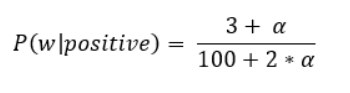

In [ ]:
## Copied from previous question
# Preprocessing

tags_dict = {'O': 0, 'B-neutral' : 0 ,'B-positive' : 0,'B-negative' : 0,'I-neutral' : 0 ,'I-positive': 0,'I-negative': 0}

def create_words_tag_dict(all_text_tags):
  words_tag_dict = {}
  new_tags_dict = tags_dict.copy()

  # add all words and their emission outputs to words_tag_dict
  # loop through all_words
  # then loop through all_text_tags to count the number of emissions from a certain word.
  # reset the dictionary for each word.
  for word in all_text_tags:
    if word[0] == '':
      continue
    words_tag_dict[word[0]] = tags_dict.copy()

  for i in range(len(all_text_tags)):
    if len(all_text_tags[i]) < 2:
      continue
    words_tag_dict[all_text_tags[i][0]][all_text_tags[i][1]] += 1

  return words_tag_dict


Fig 4.4.1.1: Creating stop_p dictionaries

RU_words_tag_dict = create_words_tag_dict(RU_all_text_tags)
ES_words_tag_dict = create_words_tag_dict(ES_all_text_tags)


# Now we define here laplace smoothing
def new_emission_MLE(x,y,words_tag_dict,tags_count,alpha = 10):
  if x in words_tag_dict:
    return (words_tag_dict[x][y] + alpha )/ ((tags_count[y]+k) * alpha)
  else:
    return alpha/(tags_count[y] * alpha)


In [ ]:
#viterbi(ES_test_input,ES_tags,ES_start_p,ES_trans_p,ES_emit_p,ES_tags_dictionary,ES_tags_count)

ES_input = get_all_text_tags('./ES/dev.in')
ES_all_test_sentences = get_sentences(ES_input)
ES_all_seq = []
for sentence in ES_all_test_sentences[0]:
  ES_V,ES_sentence_seq, ES_max_prob = viterbi_2(sentence,ES_start_p,ES_trans_p,ES_emit_p,ES_tags_dictionary,ES_tags_count)
  if ES_sentence_seq == None:
    print(sentence)
    for i in ES_V:
      print(ES_V[i])
    print('\n')
  

  ES_all_seq.append(ES_sentence_seq)


RU_input = get_all_text_tags('./RU/dev.in')
RU_all_test_sentences = get_sentences(RU_input)
RU_all_seq = []
for sentence in RU_all_test_sentences[0]:
  RU_V,RU_sentence_seq, RU_max_prob = viterbi_2(sentence,RU_start_p,RU_trans_p,RU_emit_p,RU_tags_dictionary,RU_tags_count)
  if RU_sentence_seq == None:
    print(sentence)
    for i in RU_V:
      print(RU_V[i])
    print('\n')
  

  RU_all_seq.append(RU_sentence_seq)
print(RU_all_seq)

[['O', 'O', 'O', 'O', 'O', 'O', 'B-neutral', 'O', 'O', 'O', 'B-positive', 'I-positive', 'I-positive', 'I-positive', 'I-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-neutral', 'I-neutral', 'B-neutral', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'B-positive', 'I-positive', 'I-positive', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-neutral', 'O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-positive', 'O', 'O', 

In [ ]:
def get_pred_p2(word_data,best_seq,output_file):
  all_string = ""
  for i in range(len(word_data)):
    for j in range(len(word_data[i])):
        all_string = all_string + word_data[i][j] + ' ' + best_seq[i][j] + '\n'
    all_string = all_string + '\n'
  
  with open(output_file,'w') as f:
    f.write(all_string)

def get_words_with_spaces(test_input_with_tags):
  all_sentences = []
  only_words_sentence = []
  for item in test_input_with_tags:
    if item[0] == '':
      all_sentences.append(only_words_sentence)
      only_words_sentence = []
    else:
      only_words_sentence.append(item[0])
  return all_sentences

ES_test_input_words = get_all_text_tags('./ES/dev.in')
RU_test_input_words = get_all_text_tags('./RU/dev.in')

ES_data = get_words_with_spaces(ES_test_input_words)
RU_data = get_words_with_spaces(RU_test_input_words)

get_pred_p2(ES_data,ES_all_seq,'./ES/dev.p4.out')
get_pred_p2(RU_data,RU_all_seq,'./RU/dev.p4.out')

In [ ]:
# Evaluation for ES set
!python evalResult.py ./ES/dev.out ./ES/dev.p4.out


#Entity in gold data: 255
#Entity in prediction: 579

#Correct Entity : 133
Entity  precision: 0.2297
Entity  recall: 0.5216
Entity  F: 0.3189

#Correct Sentiment : 107
Sentiment  precision: 0.1848
Sentiment  recall: 0.4196
Sentiment  F: 0.2566


In [ ]:
# Evaluation for RU set
!python evalResult.py ./RU/dev.out ./RU/dev.p4.out



#Entity in gold data: 461
#Entity in prediction: 553

#Correct Entity : 223
Entity  precision: 0.4033
Entity  recall: 0.4837
Entity  F: 0.4398

#Correct Sentiment : 145
Sentiment  precision: 0.2622
Sentiment  recall: 0.3145
Sentiment  F: 0.2860


# HMM with soft EM and laplace smoothing and pseudocounts




![image.png](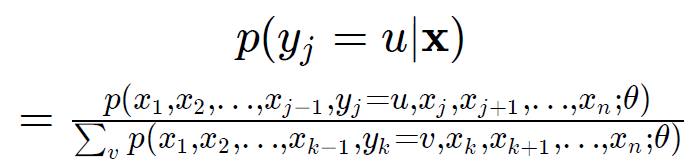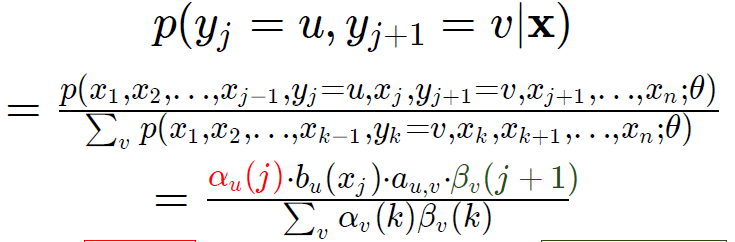)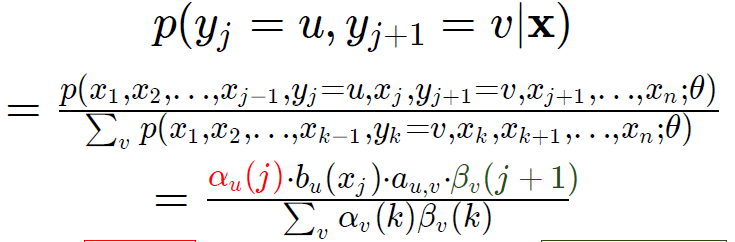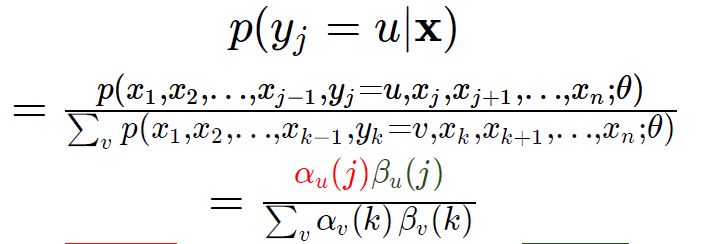

In [ ]:
# Preprocessing
# Convert files to readable string list 
def get_all_text_tags(filename):
  with open(filename,'r') as f:
    text = f.readlines()

  all_text_tags = []

  # outputs a list of with 0th element as natural language word(x), 1st element as tag (O,B-Positive,...)(y)
  for i in text:
    new_text = i.replace("\n","") # remove trailing characters \n

    if new_text == ". .. O": # Handles the . .. issue for the russian training set. Need to find a better way to do this.
      inner_list = ['. ..', 'O']
      all_text_tags.append(inner_list)
    elif new_text ==". ... O":
      inner_list = ['. ...', 'O']
      all_text_tags.append(inner_list)
    elif new_text ==". ..":
      inner_list = ['. ..']
      all_text_tags.append(inner_list)
    elif new_text ==". ...":
      inner_list = ['. ...']
      all_text_tags.append(inner_list)
    else:
      inner_list = new_text.split(' ')
      all_text_tags.append(inner_list)
    

  return all_text_tags


# This function returns all the sentences and corresponding tags for the words in the sentence
# We will require both of these values in our algorithm

def get_sentences(all_text_tags):
  inner_sentence = []
  inner_tags = []
  all_sentences = []
  all_tags = []
  for text_tags in all_text_tags:
    if text_tags[0] == '':
      all_sentences.append(inner_sentence)
      all_tags.append(inner_tags)
      inner_sentence = []
      inner_tags = []
    else:
      inner_sentence.append(text_tags[0])
      try:
        inner_tags.append(text_tags[1])
      except:
        continue

  return all_sentences, all_tags


def get_tag_count(tags_sentence):
  tags_count = {'START':0 ,'O': 0, 'B-neutral' : 0 ,'B-positive' : 0,'B-negative' : 0,'I-neutral' : 0 ,'I-positive': 0,'I-negative': 0}
  for sentence in tags_sentence:
    tags_count['START'] +=1
    for tag in sentence:
      tags_count[tag] += 1
      
  return tags_count
        


def create_tag_dictionary(tags_sentences):
  # print(tags_sentences)
  tags_dict = {'START': {}, 'O': {}, 'B-neutral' : {} ,'B-positive' : {},'B-negative' : {},'I-neutral' : {} ,'I-positive': {},'I-negative': {}}
  sub_dict = {'O': 1, 'B-neutral' : 1 ,'B-positive' : 1,'B-negative' : 1,'I-neutral' : 1 ,'I-positive': 1,'I-negative': 1, 'STOP': 0} # next tag
  # sub_dict = {'O': 0, 'B-neutral' : 0 ,'B-positive' : 0,'B-negative' : 0,'I-neutral' : 0 ,'I-positive': 0,'I-negative': 0, 'STOP': 0} # next tag
  for keys in tags_dict.keys():
    tags_dict[keys] = sub_dict.copy()
  count = 0
  for sentence in tags_sentences:
    if len(sentence) == 1:            #special case
      if sentence[0] == 'O':
        count+=1
      tags_dict['START'][sentence[0]] += 1
      tags_dict[sentence[0]]['STOP'] += 1 
    else:
      for i in range(len(sentence)):
        if sentence[i] == 'O':
          count+=1
        if i == 0:
          tags_dict['START'][sentence[i]] += 1        #add the first word
        elif i == len(sentence) - 1:
          tags_dict[sentence[i-1]][sentence[i]] += 1  #add the word that comes before it
          tags_dict[sentence[i]]['STOP'] += 1        #add the stop after it as well.
        else:
          tags_dict[sentence[i-1]][sentence[i]] += 1
  print('O',count)
  return tags_dict


# RU_all_text_tags = get_all_text_tags('./drive/MyDrive/RU/RU/train')
RU_all_text_tags = get_all_text_tags('./RU/train')
RU_sentences, RU_tags_sentence = get_sentences(RU_all_text_tags)
RU_tags_count = get_tag_count(RU_tags_sentence)
RU_tags_dictionary = create_tag_dictionary(RU_tags_sentence)

# ES_all_text_tags = get_all_text_tags('./drive/MyDrive/ES/ES/train')
ES_all_text_tags = get_all_text_tags('./ES/train')
ES_sentences, ES_tags_sentence = get_sentences(ES_all_text_tags)
ES_tags_count = get_tag_count(ES_tags_sentence)
ES_tags_dictionary = create_tag_dictionary(ES_tags_sentence)


# print(RU_sentences)
# print(RU_tags_dictionary)
# for keys in RU_tags_dictionary.keys():
#   print(f"{keys}",sum(RU_tags_dictionary[keys].values()))
# print(RU_tags_count)

# print(len(ES_sentences))
# print(ES_tags_dictionary)
# for keys in ES_tags_dictionary.keys():
#   print(f"{keys}",sum(ES_tags_dictionary[keys].values()))
# print(ES_tags_count)

O 44640
O 31627


In [ ]:
print(ES_tags_sentence)
print(ES_sentences)
print(RU_tags_sentence)
print(RU_sentences)

print(ES_emit_p)
print(ES_trans_p)
print(ES_start_p)

[['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'B-negative', 'O'], ['O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'B-negative', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'B-negative', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-negative', 'O', 'O', 'O', 'O', 'O', 'B-negative', 'I-negative', 'I-negative', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 

In [ ]:
ES_stop_p = {}
for keys, values in ES_trans_p.items():
  ES_stop_p[keys] = ES_trans_p[keys]['STOP']
print(ES_stop_p)
RU_stop_p = {}
for keys, values in RU_trans_p.items():
  RU_stop_p[keys] = RU_trans_p[keys]['STOP']
print(RU_stop_p)

{'O': 0.06481803522306889, 'B-neutral': 0.0, 'B-positive': 0.00706436420722135, 'B-negative': 0.009324009324009324, 'I-neutral': 0.0, 'I-positive': 0.005, 'I-negative': 0.0}
{'O': 0.07618727598566308, 'B-neutral': 0.0, 'B-positive': 0.00047214353163361664, 'B-negative': 0.0, 'I-neutral': 0.0, 'I-positive': 0.001447178002894356, 'I-negative': 0.008064516129032258}


In [ ]:
def forward_score(sentence,start_p,emit_p,trans_p,tags_dictionary,tags_count):
  tags = trans_p.keys()
  alpha = {}
  # ============================= 
  # Prepares the dictionary for each layer.
  for i in range(len(sentence)):
    alpha[str(i)] = {}
    for tag in tags:
      alpha[str(i)][tag] = 0
  # =============================
  for i in range(len(sentence)):
    if i == 0:
      for tag in tags:
        alpha[str(i)][tag] = start_p[tag]
    else:
      for tag in tags: # This represents the current tag we want to calculate
        total_sum = 0 
        for other_tag in tags: # This represents summing up over v, to calculate for each possible state
          try:
            total_sum += alpha[str(i-1)][other_tag] * trans_p[other_tag][tag] * emit_p[other_tag][sentence[i-1]]
          except KeyError as e:
            total_sum += alpha[str(i-1)][other_tag] * trans_p[other_tag][tag] * new_emission_MLE(sentence[i-1],other_tag,tags_dictionary,tags_count)
        alpha[str(i)][tag] = total_sum

  return alpha

In [ ]:
def backward_score(sentence, stop_p,emit_p,trans_p,tags_dictionary,tags_count):
  tags = trans_p.keys()
  beta = {}
  print(sentence)
  # ============================= 
  # Prepares the dictionary for each layer.
  for i in range(len(sentence)):
    beta[str(i)] = {}
    for tag in tags:
      beta[str(i)][tag] = 0
  # =============================
  for i in range(len(sentence)-1, -1, -1):
    if i == len(sentence)-1:
      for tag in tags:
        try:
          beta[str(i)][tag] = stop_p[tag] * emit_p[tag][sentence[i]]
        except KeyError as e:
          beta[str(i)][tag] = stop_p[tag] * new_emission_MLE(sentence[i],tag,tags_dictionary,tags_count)
    else:
      for tag in tags: # This represents the current tag we want to calculate
        total_sum = 0 
        for other_tag in tags: # This represents summing up over v, to calculate for each possible state
          try:
            total_sum += beta[str(i+1)][other_tag] * trans_p[tag][other_tag] * emit_p[tag][sentence[i]]
          except KeyError as e:
            total_sum += beta[str(i+1)][other_tag] * trans_p[tag][other_tag] * new_emission_MLE(sentence[i],tag,tags_dictionary,tags_count)
        beta[str(i)][tag] = total_sum

  return beta

In [ ]:
ES_input = get_all_text_tags('./ES/dev.in')
ES_all_test_sentences = get_sentences(ES_input)
print(ES_all_test_sentences)
forward_scores = forward_score(ES_all_test_sentences[0][0],ES_start_p,ES_emit_p,ES_trans_p,ES_tags_dictionary,ES_tags_count)
backward_scores = backward_score(ES_all_test_sentences[0][0],ES_stop_p,ES_emit_p,ES_trans_p,ES_tags_dictionary,ES_tags_count)

([['La', 'comida', 'estuvo', 'muy', 'sabrosa', '.'], ['Servicio', 'esmerado', '.'], ['Para', 'un', 'menu', 'gastronomico', ',', 'si', 'la', 'comida', 'es', 'solo', 'buena', ',', 'por', 'no', 'decir', 'discreta', '(', 'en', 'lo', 'que', 'a', 'paella', 'como', 'plato', 'principal', 'se', 'refiere', ')', 'el', 'resultado', 'fue', 'algo', 'decepcionante', ',', 'aunque', 'el', 'precio', 'podria', 'considerarse', 'excepcional', '.'], ['Servicio', 'atento', 'y', 'eficiente', ',', 'ambiente', 'agradable', '.'], ['Tienen', 'una', 'carta', 'bastante', 'extensa', 'donde', 'cada', 'plato', 'parece', 'mejor', 'que', 'el', 'anterior', '.'], ['Un', '10', 'en', 'comida', 'mediterranea', '!'], ['Una', 'verguenza', 'todo', '.'], ['lo', 'tendre', 'en', 'cuenta', 'para', 'las', 'proximas', 'veces', '.'], ['Mi', 'opinión', 'sobre', 'el', 'restaurante', 'La', 'Poma', 'es', 'que', 'es', 'correcto', ',', 'pero', 'no', 'extraordinario', '.'], ['P', '.', 'D', '.'], ['A', 'la', 'una', 'mi', 'mujer', 'y', 'yo', '

In [ ]:
print(forward_scores)
print(backward_scores)

{'0': {'O': 0.9292978208232445, 'B-neutral': 0.005326876513317191, 'B-positive': 0.05375302663438257, 'B-negative': 0.013559322033898305, 'I-neutral': 0.00048426150121065375, 'I-positive': 0.00048426150121065375, 'I-negative': 0.00048426150121065375}, '1': {'O': 0.004048887551072186, 'B-neutral': 1.0873364856154452e-05, 'B-positive': 0.0001675433432637173, 'B-negative': 5.810475540549324e-05, 'I-neutral': 2.1750235416947911e-07, 'I-positive': 2.1750235416947911e-07, 'I-negative': 5.950830909729017e-06}, '2': {'O': 2.7416698568387072e-05, 'B-neutral': 6.694597717850638e-08, 'B-positive': 2.2664230766681414e-07, 'B-negative': 9.065804504492263e-08, 'I-neutral': 2.527835870290631e-07, 'I-positive': 3.079711580938325e-06, 'I-negative': 5.299608503493808e-07}, '3': {'O': 1.4550081677812223e-08, 'B-neutral': 3.9057126908944774e-11, 'B-positive': 6.056458479347034e-10, 'B-negative': 2.098669619240632e-10, 'I-neutral': 5.207616921192636e-13, 'I-positive': 5.207616921192636e-13, 'I-negative': 5

In [ ]:
ES_input = get_all_text_tags('./ES/dev.in')
ES_all_test_sentences = get_sentences(ES_input)

In [ ]:
def hmmSoftEM(sentence, start_p, stop_p,emit_p,trans_p,tags_dictionary,tags_count):
  forward_scores = forward_score(sentence,start_p,emit_p,trans_p,tags_dictionary,tags_count)
  backward_scores = backward_score(sentence,stop_p,emit_p,trans_p,tags_dictionary,tags_count)
  result_list = [] ##Sequence of the max score after multiplied
  result = {}
  for keys, values in forward_scores.items():
    result[keys] = {}
    maxValue = 0
    for i in values.keys():
      multiplied = values[i] * backward_scores[keys][i]
      result[keys][i] = multiplied
    print(result[keys])
    tempMax = max(result[keys], key=result[keys].get)
    result_list.append(tempMax)
  return result_list  

In [ ]:
hmmSoftEM(ES_all_test_sentences[0][4], ES_start_p, ES_stop_p,ES_emit_p,ES_trans_p,ES_tags_dictionary,ES_tags_count)

['Tienen', 'una', 'carta', 'bastante', 'extensa', 'donde', 'cada', 'plato', 'parece', 'mejor', 'que', 'el', 'anterior', '.']
{'O': 1.3833830218810184e-42, 'B-neutral': 0.0, 'B-positive': 0.0, 'B-negative': 0.0, 'I-neutral': 0.0, 'I-positive': 0.0, 'I-negative': 0.0}
{'O': 1.383377873550524e-42, 'B-neutral': 0.0, 'B-positive': 0.0, 'B-negative': 0.0, 'I-neutral': 0.0, 'I-positive': 5.1483304943108323e-48, 'I-negative': 0.0}
{'O': 7.358998335654797e-43, 'B-neutral': 2.0984183602738972e-44, 'B-positive': 3.608985168444605e-43, 'B-negative': 2.6560048786833907e-43, 'I-neutral': 0.0, 'I-positive': 0.0, 'I-negative': 0.0}
{'O': 1.31226550207812e-42, 'B-neutral': 0.0, 'B-positive': 0.0, 'B-negative': 0.0, 'I-neutral': 0.0, 'I-positive': 0.0, 'I-negative': 7.111751980289801e-44}
{'O': 1.3833830218810182e-42, 'B-neutral': 0.0, 'B-positive': 0.0, 'B-negative': 0.0, 'I-neutral': 0.0, 'I-positive': 0.0, 'I-negative': 0.0}
{'O': 1.3833830218810182e-42, 'B-neutral': 0.0, 'B-positive': 0.0, 'B-negati

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

In [ ]:
ES_input = get_all_text_tags('./ES/dev.in')
ES_all_test_sentences = get_sentences(ES_input)
ES_all_seq = []
for sentence in ES_all_test_sentences[0]:
  ES_sentence_seq = hmmSoftEM(sentence,ES_start_p, ES_stop_p, ES_emit_p,ES_trans_p,ES_tags_dictionary,ES_tags_count)
  ES_all_seq.append(ES_sentence_seq)

RU_input = get_all_text_tags('./RU/dev.in')
RU_all_test_sentences = get_sentences(RU_input)
RU_all_seq = []
for sentence in RU_all_test_sentences[0]:
  RU_sentence_seq = hmmSoftEM(sentence,RU_start_p, RU_stop_p,RU_emit_p,RU_trans_p,RU_tags_dictionary,RU_tags_count)
  RU_all_seq.append(RU_sentence_seq)
print(RU_all_seq)
print(ES_all_seq)

ES_test_input_words = get_all_text_tags('./ES/dev.in')
RU_test_input_words = get_all_text_tags('./RU/dev.in')

ES_data = get_words_with_spaces(ES_test_input_words)
RU_data = get_words_with_spaces(RU_test_input_words)

get_pred_p2(ES_data,ES_all_seq,'./ES/dev.p4.out')
get_pred_p2(RU_data,RU_all_seq,'./RU/dev.p4.out')

Streaming output truncated to the last 5000 lines.
{'O': 4.8669605415577164e-45, 'B-neutral': 0.0, 'B-positive': 0.0, 'B-negative': 0.0, 'I-neutral': 1.0188220141642757e-46, 'I-positive': 1.0308569970087607e-47, 'I-negative': 1.4775810904041336e-47}
{'O': 4.9939271238482717e-45, 'B-neutral': 0.0, 'B-positive': 0.0, 'B-negative': 0.0, 'I-neutral': 0.0, 'I-positive': 0.0, 'I-negative': 0.0}
{'O': 4.9937175218808167e-45, 'B-neutral': 0.0, 'B-positive': 0.0, 'B-negative': 0.0, 'I-neutral': 9.202167083156541e-50, 'I-positive': 7.287377618991277e-50, 'I-negative': 4.470652043332161e-50}
{'O': 4.993927123848272e-45, 'B-neutral': 0.0, 'B-positive': 0.0, 'B-negative': 0.0, 'I-neutral': 0.0, 'I-positive': 0.0, 'I-negative': 0.0}
{'O': 4.993927123848272e-45, 'B-neutral': 0.0, 'B-positive': 0.0, 'B-negative': 0.0, 'I-neutral': 0.0, 'I-positive': 0.0, 'I-negative': 0.0}
{'O': 4.9939271238482717e-45, 'B-neutral': 0.0, 'B-positive': 0.0, 'B-negative': 0.0, 'I-neutral': 0.0, 'I-positive': 0.0, 'I-nega

In [ ]:
# Evaluation for ES set
!python evalResult.py ./ES/dev.out ./ES/dev.p4.out


#Entity in gold data: 255
#Entity in prediction: 597

#Correct Entity : 130
Entity  precision: 0.2178
Entity  recall: 0.5098
Entity  F: 0.3052

#Correct Sentiment : 104
Sentiment  precision: 0.1742
Sentiment  recall: 0.4078
Sentiment  F: 0.2441


In [ ]:
# Evaluation for RU set
!python evalResult.py ./RU/dev.out ./RU/dev.p4.out


#Entity in gold data: 461
#Entity in prediction: 607

#Correct Entity : 226
Entity  precision: 0.3723
Entity  recall: 0.4902
Entity  F: 0.4232

#Correct Sentiment : 146
Sentiment  precision: 0.2405
Sentiment  recall: 0.3167
Sentiment  F: 0.2734
